In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("framingham_heart_disease.csv")

In [3]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dados.shape

(4238, 16)

In [5]:
dados.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
fd = pd.isnull(dados["cigsPerDay"])
fd

0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: cigsPerDay, Length: 4238, dtype: bool

In [7]:
de = dados.drop(['currentSmoker','education'], axis = 'columns')
de.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
re = de["cigsPerDay"]
re.head()

0     0.0
1     0.0
2    20.0
3    30.0
4    23.0
Name: cigsPerDay, dtype: float64

In [9]:
ref = re.mean()
ref

9.003088619624615

In [10]:
tr = math.floor(ref)
tr

9

In [11]:
re.fillna(tr, inplace = True)
re

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4233     1.0
4234    43.0
4235    20.0
4236    15.0
4237     0.0
Name: cigsPerDay, Length: 4238, dtype: float64

In [12]:
dados.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
dados.dropna( axis = 0, inplace = True)

In [14]:
dados.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
dados.shape

(3656, 16)

In [16]:
xd = dados.drop(['diaBP','BMI','heartRate'], axis = 'columns')

In [17]:
ha = xd[xd.TenYearCHD == 0]
ha.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,99.0,0


In [18]:
ha = xd[xd.TenYearCHD == 1]
ha.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,66.0,1


**Estatística** 

In [19]:
dados.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [20]:
dados.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


In [21]:
xd.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
TenYearCHD,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,88.732496


In [22]:
print("Media", dados["age"].mean())

Media 49.5574398249453


In [23]:
print("Mediana", dados["age"].median())

Mediana 49.0


In [24]:
print("Moda", dados["age"].mode())

Moda 0    40
1    46
dtype: int64


In [25]:
print("Desvio padrão", dados["age"].std())

Desvio padrão 8.56113346428899


In [26]:
dados.cov()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,0.246893,-0.103739,0.008982,0.051367,1.961714,-0.004445,-0.000087,0.000185,0.001116,-1.538754,-0.499299,0.306877,0.147213,-0.684268,0.036214,0.016384
age,-0.103739,73.293006,-1.391724,-0.902518,-19.295527,0.197845,0.032912,1.216163,0.151522,101.084447,73.489046,21.414013,4.774799,-0.275492,24.204436,0.719427
education,0.008982,-1.391724,1.045828,0.012911,0.164881,-0.002395,-0.002346,-0.037468,-0.006565,-0.584238,-2.813069,-0.716418,-0.570815,-0.787397,-0.779383,-0.023181
currentSmoker,0.051367,-0.902518,0.012911,0.249949,4.611050,-0.004456,-0.001442,-0.024908,-0.003397,-1.126970,-1.484139,-0.692960,-0.324373,0.302250,-0.637689,0.003446
cigsPerDay,1.961714,-19.295527,0.164881,4.611050,142.059427,-0.095064,-0.032685,-0.385837,-0.071462,-15.884191,-24.952889,-8.085466,-4.210689,9.076285,-15.332790,0.223436
BPMeds,-0.004445,0.197845,-0.002395,-0.004456,-0.095064,0.029447,0.001467,0.020908,0.001366,0.711378,1.028495,0.410468,0.073681,0.026513,0.222427,0.005496
prevalentStroke,-0.000087,0.032912,-0.002346,-0.001442,-0.032685,0.001467,0.005713,0.002314,0.000118,0.042316,0.101989,0.050574,0.011210,-0.015415,0.029007,0.001313
prevalentHyp,0.000185,1.216163,-0.037468,-0.024908,-0.385837,0.020908,0.002314,0.214543,0.006062,3.412464,7.140443,3.425762,0.570477,0.817748,0.964944,0.030225
diabetes,0.001116,0.151522,-0.006565,-0.003397,-0.071462,0.001366,0.000118,0.006062,0.026353,0.346256,0.367870,0.098688,0.058724,0.118652,2.386387,0.005449
totChol,-1.538754,101.084447,-0.584238,-1.126970,-15.884191,0.711378,0.042316,3.412464,0.346256,1944.476912,214.448773,92.400191,21.658222,49.171816,52.452324,1.444238


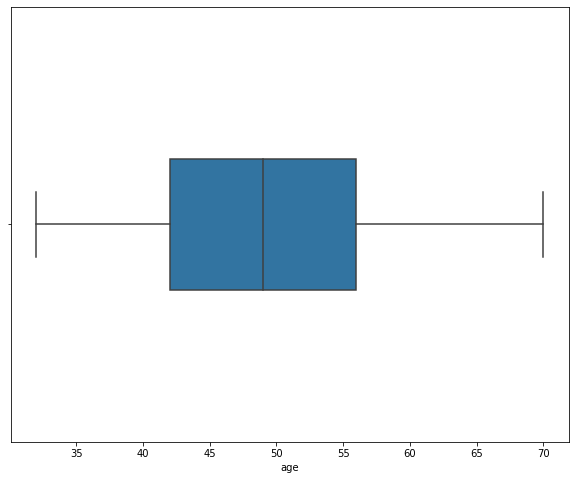

In [27]:
plt.figure(figsize=(10,8))

df = sns.boxplot(data=dados, x="age", orient="h", width = 0.3)

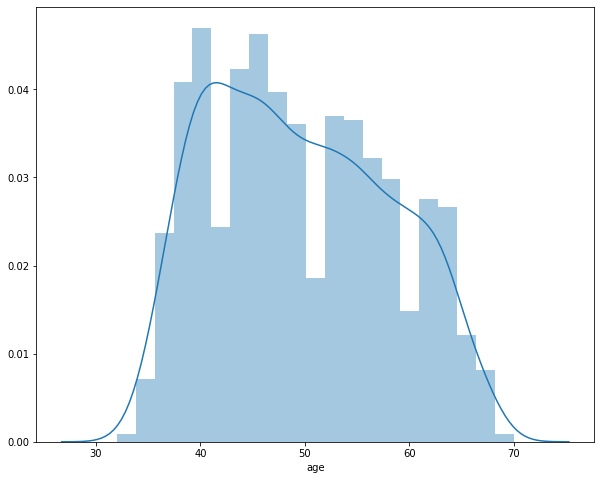

In [28]:
plt.figure(figsize=(10,8))

sns.distplot(dados["age"])

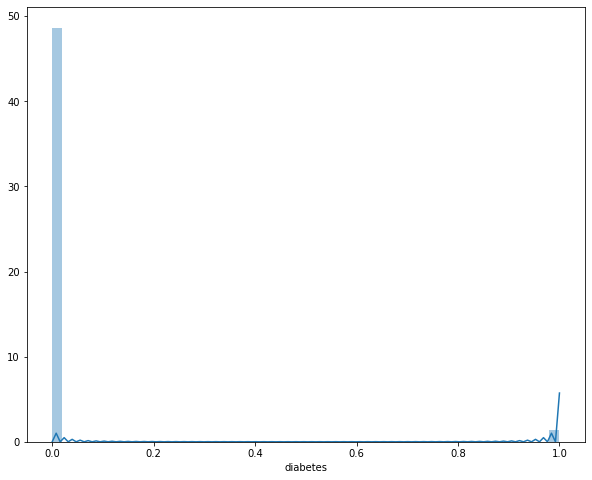

In [29]:
plt.figure(figsize=(10,8))

sns.distplot(dados["diabetes"])

In [30]:
X = dados[['male','age','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','glucose']]
y = dados["TenYearCHD"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

# Naive bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train, y_train)
naive_sco = naive.score(X_test, y_test)
naive_pred = naive.predict(X_test)
print(naive_sco)
print("\n")
print(naive_pred)

0.7663934426229508


[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

In [35]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
md = modelo.score(X_test, y_test)
modelo_pred = modelo.predict(X_test)
print(md)
print("\n")
print(modelo_pred)

0.07809096178192854


[ 2.10463613e-01  3.33630761e-01  2.34762192e-03  1.50717900e-01
  1.75862454e-01  2.04092605e-01  2.66237719e-01  1.77613365e-01
  1.72798880e-01  2.55885178e-01  2.74719217e-01  3.27878184e-01
  9.00180645e-02 -4.90151343e-03  2.01470888e-01  1.06256808e-01
  7.77239507e-01  1.16089317e-01  1.82796122e-01  1.55323299e-01
  1.33905582e-01  7.89020611e-02  2.48899332e-01  2.00652848e-01
  1.79581080e-01  2.15073352e-01  2.24469879e-01  7.36222978e-02
  2.21223777e-01  4.03367738e-01  2.01501043e-01  2.50593543e-01
  6.92904590e-02  5.35315821e-02  7.91532571e-02  1.30432605e-01
  2.12159147e-01  2.02433732e-02  1.24511755e-01  1.28323745e-01
  3.10191853e-01  2.40988072e-01  4.12323320e-01  2.52497816e-01
  3.01489474e-02  1.33222148e-01  6.92782070e-02 -2.76746372e-03
  1.23788763e-01  1.53546742e-01  1.20819613e-01  2.27319183e-01
  9.15156688e-03  1.34348893e-01  5.37141175e-02  6.39193974e-02
  3.82165334e-02  2.42179926e-01  1.37384441e-01  6.38983379e-03
  1

In [36]:
modelo.coef_

array([0.0615414 , 0.00721713, 0.00256554, 0.0702324 , 0.06818992,
       0.02735226, 0.04040569, 0.00015389, 0.00194558, 0.00129523])

In [37]:
modelo.intercept_

-0.665622337105746

In [44]:
from sklearn import metrics

EQM = metrics.mean_squared_error(y_test, modelo_pred).round(2)
print("EQM foi: %.2f" %(EQM))

EQM foi: 0.11


In [45]:
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, modelo_pred)).round(2)
print("REQM_2 foi: %.2f" %(REQM_2))

REQM_2 foi: 0.34


In [46]:
R2_2 = metrics.r2_score(y_test, modelo_pred).round(2)
print("R2_2 foi: %.2f" %(R2_2))

R2_2 foi: 0.08


In [61]:
pd.DataFrame([EQM, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,0.11
REQM,0.34
R²,0.08


In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, modelo_pred))
print("RMSE foi: %.2f" %(rmse))

RMSE foi: 0.34


**Previsão**

In [53]:
X_test[0:1]

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
3703,1,42,30.0,0.0,0,0,0,283.0,145.0,84.0


In [54]:
entrada = X_test[0 : 1]
entrada

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
3703,1,42,30.0,0.0,0,0,0,283.0,145.0,84.0


In [56]:
pre = modelo.predict(entrada)[0]
print("Previsao: %.2f" %(pre))

Previsao: 0.21


**Salvando o modelo**

In [57]:
import pickle

In [58]:
saida = open("modelo_de_regressao_logistica", "wb")
pickle.dump(modelo, saida)
saida.close()